In [39]:
import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import models, layers
import matplotlib.pyplot as plt

#1. Data Loader

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() # 학습에 6만게 테스트에 1만개 들어감.

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
print(y_train[0])

5



#2. X입력 데이타에 전처리 과정이 필요하다 ToTensor()로 스케일링이 안됨

In [12]:
L,W,H = X_train.shape
print(L)
print(W)
print(H)

60000
28
28


#####2-1. reshape 일자로 펼침

In [15]:
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


#####2-2. Scaling 작업

In [16]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
y_train[0]

5

#3. y값 전처리

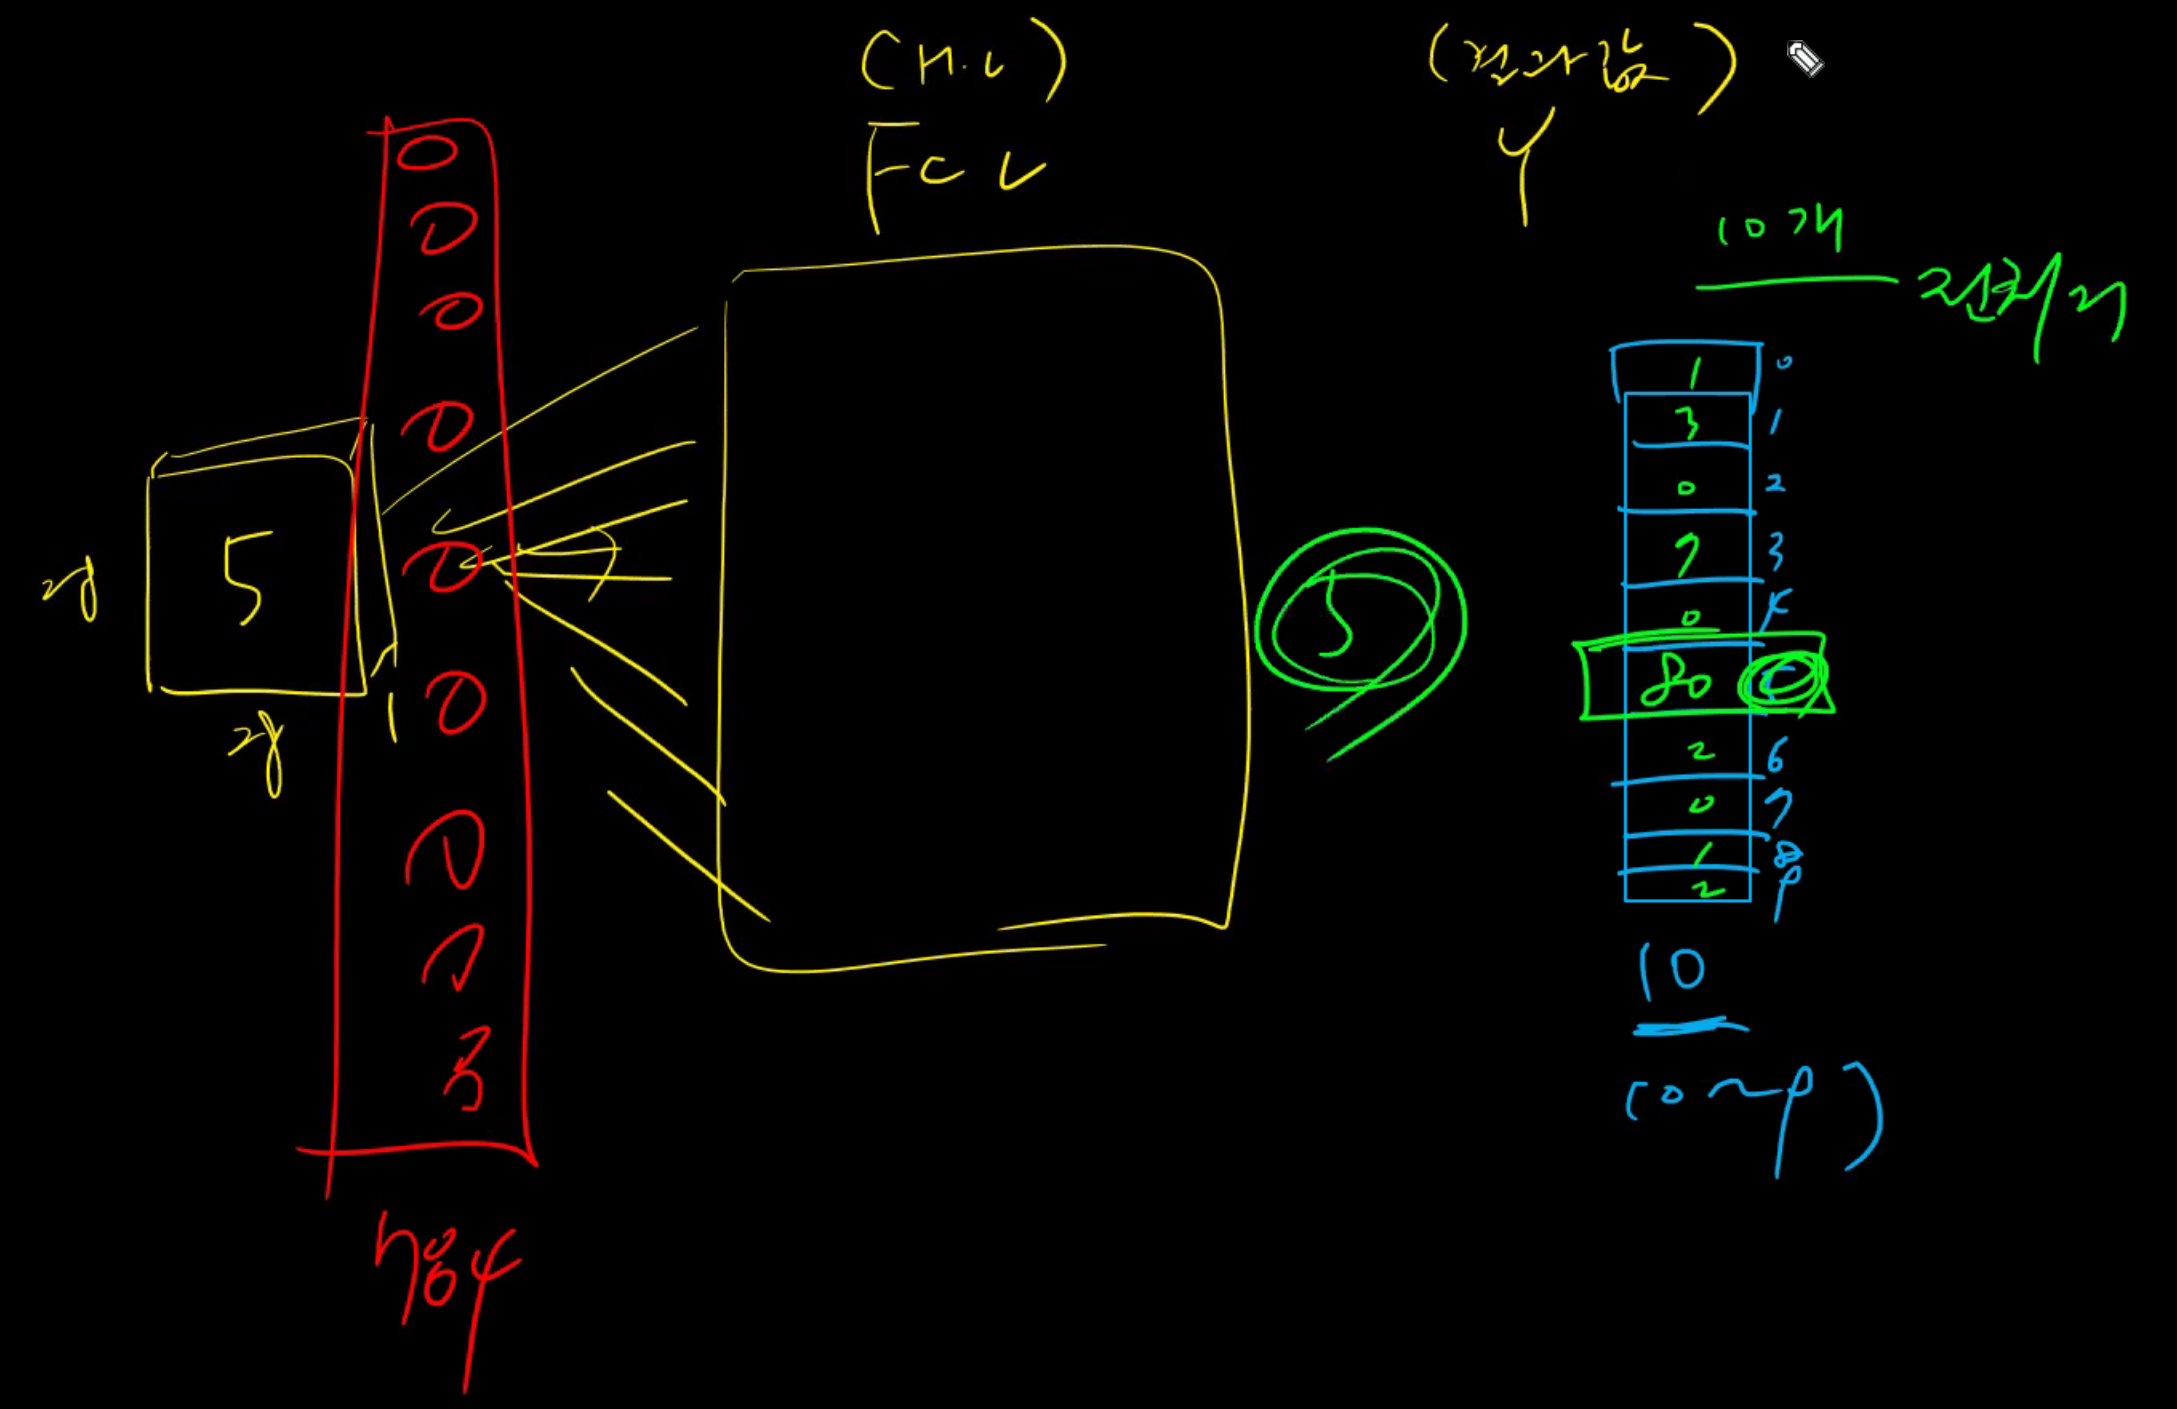

케라스에서는 One Hot Encoding으로 정답만 1로 하고 나머지는 0으로 만들어줌

In [22]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#4. Settings Parameters

In [23]:
input_size = 28*28
hidden_size = 100 #중간 출력 갯수
num_classes = 10
num_out = num_classes
num_epochs = 10
batch_size = 100

#5. Constructor Model

In [24]:
model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,))) #FCL과 같은 부분이다.
model.add(layers.Dense(num_classes, activation='softmax')) # 아웃풋으로 num_classes, 인풋으로 hidden으로 들어감

#6. compile

In [25]:
model.compile('sgd','categorical_crossentropy',metrics=['accuracy'])

#7. Training

In [26]:
model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size,validation_split=0.2) # validation_split은 X에서 학습데이터:80, validation:20 validation은 모의고사와 같다

Epoch 1/10
480/480 [==============================] - 3s 3ms/step - loss: 1.6210 - accuracy: 0.5420 - val_loss: 0.6246 - val_accuracy: 0.8650
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.6002 - accuracy: 0.8574 - val_loss: 0.4449 - val_accuracy: 0.8892
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.8774 - val_loss: 0.3830 - val_accuracy: 0.8996
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8901 - val_loss: 0.3518 - val_accuracy: 0.9057
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3706 - accuracy: 0.8981 - val_loss: 0.3317 - val_accuracy: 0.9091
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.9030 - val_loss: 0.3165 - val_accuracy: 0.9126
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.9041 - val_loss: 0.3057 - val_accuracy: 0.9153
Epoch 

validation_split은 backward되지 않는다.

#8. Evaluation

In [30]:
model_performance = model.evaluate(X_test,Y_test,batch_size=batch_size)
print(f'loss:{model_performance[0]}, accuracy:{model_performance[1]}')
print(*model_performance)

100/100 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.9222
loss:0.28079408407211304, accuracy:0.9222000241279602
0.28079408407211304 0.9222000241279602


#9. Loss and Accuracy Visulization

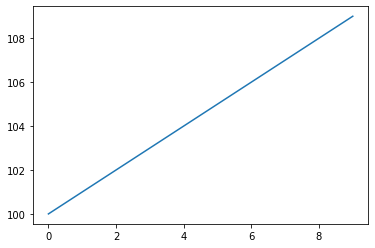

In [31]:
import matplotlib.pyplot as plt
# history : 트레이닝 할때 나오는 모든 로그 메세지들을 다 모아서 리턴한다. 객체정보이다.

# loss 관련된 plot 함수
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])


Epoch 1/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9795 - val_loss: 0.1095 - val_accuracy: 0.9682
Epoch 2/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9794 - val_loss: 0.1088 - val_accuracy: 0.9684
Epoch 3/100
480/480 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9796 - val_loss: 0.1089 - val_accuracy: 0.9685
Epoch 4/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9797 - val_loss: 0.1084 - val_accuracy: 0.9682
Epoch 5/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9798 - val_loss: 0.1083 - val_accuracy: 0.9691
Epoch 6/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9798 - val_loss: 0.1077 - val_accuracy: 0.9683
Epoch 7/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9804 - val_loss: 0.1074 - val_accuracy: 0.9693

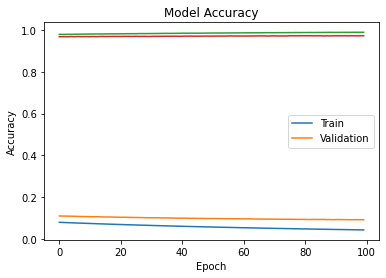

In [34]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=batch_size, validation_split=0.2)

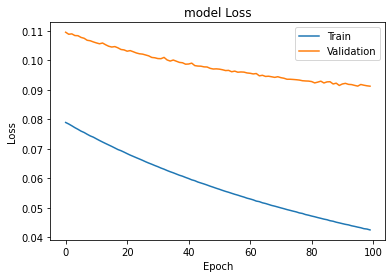

In [37]:
plot_loss(history)

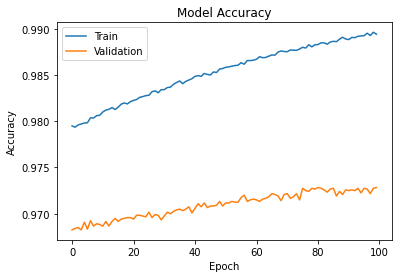

In [38]:
plot_acc(history)